In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
train = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_train.csv')
test = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_test.csv')

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
#Change the categorical data to numerical data
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
train["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [44]:
#Change the categorical data to numerical data
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test["Embarked"].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [45]:
train["Sex"] = train["Sex"].fillna("male")
train["Sex"] = train["Sex"].map({"male": 0, "female": 1}).astype(int)
train["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [46]:
test["Sex"] = test["Sex"].fillna("male")
test["Sex"] = test["Sex"].map({"male": 0, "female": 1}).astype(int)
test["Sex"].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [47]:
train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [48]:
test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [49]:
train = train.dropna()

In [50]:
test["Age"].fillna(test.Age.mean(), inplace=True)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [53]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514,0.260504
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.521012
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,0.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [54]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.907576,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [55]:
train["Pclass"] = train["Pclass"]/3
train["Age"] = train["Age"]/80
train["SibSp"] = train["SibSp"]/8
train["Parch"] = train["Parch"]/9
train["Fare"] = train["Fare"]/512
train["Embarked"] = train["Embarked"]/2

test["Pclass"] = test["Pclass"]/3
test["Age"] = test["Age"]/80
test["SibSp"] = test["SibSp"]/8
test["Parch"] = test["Parch"]/9
test["Fare"] = test["Fare"]/512
test["Embarked"] = test["Embarked"]/2

In [56]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)

Epoch 1/10


714/714 [==============================] - 1s 852us/step - loss: 0.6404 - accuracy: 0.6317
Epoch 2/10
714/714 [==============================] - 1s 848us/step - loss: 0.5625 - accuracy: 0.7731
Epoch 3/10
714/714 [==============================] - 1s 860us/step - loss: 0.5397 - accuracy: 0.7941
Epoch 4/10
714/714 [==============================] - 1s 839us/step - loss: 0.5236 - accuracy: 0.8025
Epoch 5/10
714/714 [==============================] - 1s 842us/step - loss: 0.5129 - accuracy: 0.8025
Epoch 6/10
714/714 [==============================] - 1s 984us/step - loss: 0.5029 - accuracy: 0.8039
Epoch 7/10
714/714 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.8025
Epoch 8/10
714/714 [==============================] - 1s 833us/step - loss: 0.4902 - accuracy: 0.7941
Epoch 9/10
714/714 [==============================] - 1s 876us/step - loss: 0.4850 - accuracy: 0.7997
Epoch 10/10
14/14 [==============================] - 0s 753us/step
[[0]
 [0]
 [0]
 [0]
 [1]
 [0

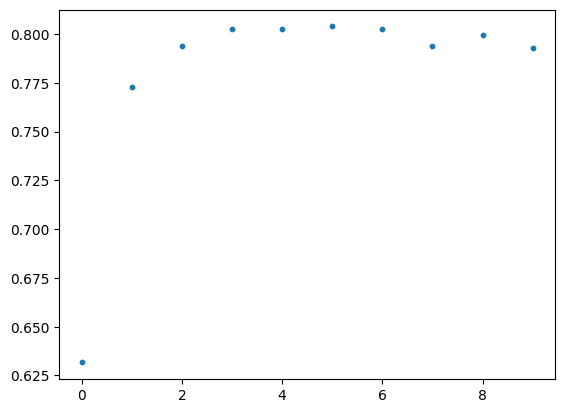

In [64]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

number_of_epochs = 10
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=1, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)
predictions = (model.predict(X_test) > 0.5).astype(int)
print(predictions[:10])

In [65]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="/workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission10.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions.reshape(-1)

})
make_submission(kaggle_predictions)

Submission exported to /workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission10.csv
